In [24]:
#import numpy as np

#data = np.load(r"/home/rosario/explainable/Bachelor/Results/Num_Epochs_5batchSize_42023-01-14_172750/featureListALL.npz")
#a = data["featureListALL"][0]
#for i in a:
#    if i != 0.0 and i != 1.0: 
#        print(repr(np.float64(i)))
        

In [25]:
import numpy as np

rulesResults = np.load("./WorkingResults/_2023-08-01_223203.npz", allow_pickle=True)
trainResults = np.load("./WorkingResults/data.npz", allow_pickle=True)

# = np.load("./WorkingResults/rulesResults/discriminative_rules/_2023-07-21_10:45:16.npz")

#for i in trainingResults:
#    print(i)
#print("----")






In [26]:
for i in rulesResults:
    print(i)
    #print(rulesResults[str("trackedRules_OHE")])

rules_list_overIterations
labelList_rules_overIterations
rulePrecisionList_overIterations
predictionComparisonList_overIterations
rulesComplexityList_overIterations
globalCoverageList_overIterations
ruleSupportList_overIterations
numberOfGeneratedRules_overIterations
jaccardSimilarity_overIterations
cosineSimilarity_overIterations
overlapSimilarity_overIterations
diceSimilarity_overIterations
raw_rules_overIterations
numberOfGeneratedRulesRAW_overIterations
rulePrecisionListPerRule_overIterations
trackedRules_OHE


In [35]:
#changes binnned in n_sized bins 
    # count how often the apprearance of a rule has changed over iterations 
import numpy as np
#trackedRules_OHE  = np.array([[1,0,1,1,1,1,0,0,1],
#                                  [0,0,0,0,0,0,0,0,1],
 #                                 [0,0,0,0,1,1,0,0,0]])

def getchangeTrackerList(trackedRules_OHE):
    #transpore
    trackedRules_OHE = np.array(trackedRules_OHE).transpose()

    #now we have over the rows the iterarations  
    # and over the colums the rules   
    """
        iterations   -> 
        [[1 1 1 0 0]
      ^ [1 0 0 1 0]
      | [0 1 1 0 1]]
    rules list

    
    """
    #trackedRules_OHE  = np.array([[1,0,1,1,1,1,0,0,1],
    ##                              [0,0,0,0,0,0,0,0,1],
    #                              [0,0,0,0,1,1,0,0,0]])
    changeTrackerList =[]
    for i in trackedRules_OHE:
        temp = -1
        changeTracker = []
        for j in range(len(i)):
            #if i[j] != 0:
                if i[j] != temp:
                    changeTracker.append(1)
                    temp = i[j]
                else:
                    changeTracker.append(0)
                    temp = i[j]
        changeTrackerList.append(changeTracker)

    return changeTrackerList

changeTrackerList = getchangeTrackerList(rulesResults["trackedRules_OHE"])#(rulesResults["trackedRules_OHE"])

#print(changeTrackerList)
#print(len(changeTrackerList))

#trackedRules_OHE  = [[1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1],]
                                  
print(rulesResults["trackedRules_OHE"])
def countConsequtiveRuleApperance(trackedRules_OHE,n):
    ruleAtIterationIsImportant_List = []
    for i in trackedRules_OHE:
        #print(i)
        ruleAtIterationIsImportant =[]
        for j in range(0,len(i)):
            #print("j")
            #print(j)

            
            #print(j)
           # print(n)
           # print(j<=n)
            if j < n -1:
                #print("ok?")
                ruleAtIterationIsImportant.append(0) #0 is not important | cause n iterations not reached yet
            elif j > (len(i) -n):
                ruleAtIterationIsImportant.append(0)
            else:
                tempConsequentApperanceCounter = list(i[j:j+n]).count(1)
                #print("a")
                #print(tempConsequentApperanceCounter)
                #print(i[j:j+n].count(1))
                #print("aaaa")
                #print(tempConsequentApperanceCounter)
                if tempConsequentApperanceCounter == n:
                   # print("asasasdaas")
                    ruleAtIterationIsImportant.append(1) # is imortant at iteration
                else:
                    ruleAtIterationIsImportant.append(0)
        #print(ruleAtIterationIsImportant)
        ruleAtIterationIsImportant_List.append(ruleAtIterationIsImportant)

    return ruleAtIterationIsImportant_List

ruleAtIterationIsImportant_List_3= countConsequtiveRuleApperance(rulesResults["trackedRules_OHE"],3)
ruleAtIterationIsImportant_List_5= countConsequtiveRuleApperance(rulesResults["trackedRules_OHE"],5)
ruleAtIterationIsImportant_List_10= countConsequtiveRuleApperance(rulesResults["trackedRules_OHE"],10)
ruleAtIterationIsImportant_List_20= countConsequtiveRuleApperance(rulesResults["trackedRules_OHE"],20)
ruleAtIterationIsImportant_List_50= countConsequtiveRuleApperance(rulesResults["trackedRules_OHE"],50)

print(len(ruleAtIterationIsImportant_List_3))
print(len(ruleAtIterationIsImportant_List_5))

[[1 0 1 ... 0 1 1]
 [1 1 0 ... 0 0 1]
 [0 1 0 ... 0 0 1]
 ...
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]]
151
151


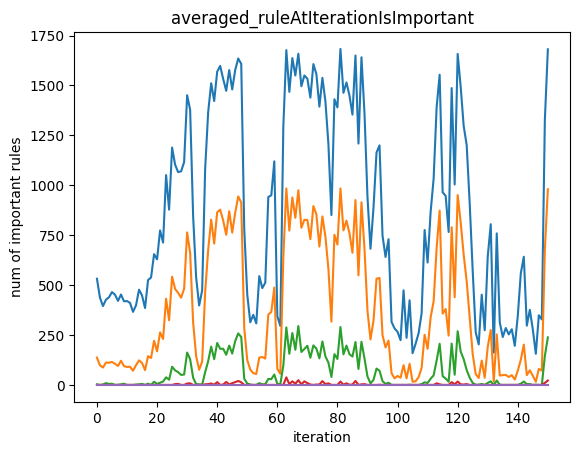

In [36]:
averaged_ruleAtIterationIsImportant_List_3 = []
averaged_ruleAtIterationIsImportant_List_5 = []
averaged_ruleAtIterationIsImportant_List_10 = []
averaged_ruleAtIterationIsImportant_List_20 = []
averaged_ruleAtIterationIsImportant_List_50 = []

for i in range(len(ruleAtIterationIsImportant_List_3)):
    #print(i)
    averaged_ruleAtIterationIsImportant_List_3.append(ruleAtIterationIsImportant_List_3[i].count(1))
    averaged_ruleAtIterationIsImportant_List_5.append(ruleAtIterationIsImportant_List_5[i].count(1))
    averaged_ruleAtIterationIsImportant_List_10.append(ruleAtIterationIsImportant_List_10[i].count(1))
    averaged_ruleAtIterationIsImportant_List_20.append(ruleAtIterationIsImportant_List_20[i].count(1))
    averaged_ruleAtIterationIsImportant_List_50.append(ruleAtIterationIsImportant_List_50[i].count(1))




#print(max(averaged_ruleAtIterationIsImportant_List))
#print(min(averaged_ruleAtIterationIsImportant_List))

import matplotlib.pyplot as plt

figAcc, axsAcc = plt.subplots(nrows=1, ncols=1)

    #data = utils.loadData(dataPath+ "data.npz")

axsAcc.set_title("averaged_ruleAtIterationIsImportant")
axsAcc.set_xlabel("iteration")
axsAcc.set_ylabel("num of important rules")
axsAcc.plot(averaged_ruleAtIterationIsImportant_List_3, label='consequent apperance: 3')
axsAcc.plot(averaged_ruleAtIterationIsImportant_List_5, label='consequent apperance: 5')
axsAcc.plot(averaged_ruleAtIterationIsImportant_List_10, label='consequent apperance: 10')
axsAcc.plot(averaged_ruleAtIterationIsImportant_List_20, label='consequent apperance: 20')
axsAcc.plot(averaged_ruleAtIterationIsImportant_List_50, label='consequent apperance: 50')



[1123, 1816, 2259, 1554, 1525, 1645, 1426, 1470, 2051, 1341, 1090, 1225, 1368, 2054, 1367, 924, 1956, 1734, 1097, 1628, 1104, 1126, 410, 353, 527, 764, 284, 694, 557, 488, 408, 442, 953, 932, 1290, 809, 475, 436, 337, 332, 312, 225, 189, 175, 73, 215, 186, 329, 195, 671, 993, 1590, 1389, 1467, 937, 1081, 573, 455, 373, 517, 1324, 1653, 185, 272, 88, 177, 15, 12, 156, 40, 39, 260, 129, 217, 299, 166, 258, 285, 430, 221, 352, 139, 173, 267, 181, 287, 224, 161, 223, 225, 253, 479, 429, 159, 244, 241, 454, 246, 1503, 1630, 821, 1634, 835, 1258, 407, 1259, 1290, 854, 851, 227, 392, 111, 212, 268, 2, 70, 192, 375, 115, 147, 16, 39, 45, 165, 294, 419, 1116, 1678, 506, 1240, 253, 240, 719, 104, 508, 1259, 873, 637, 708, 1529, 619, 260, 403, 665, 472, 719, 1315, 395, 718, 257, 28]
[1092, 866, 1610, 2374, 1352, 1481, 758, 1570, 1272, 1554, 1813, 1626, 1725, 1482, 1376, 1181, 1935, 1633, 2113, 1266, 1507, 1044, 691, 243, 623, 712, 289, 644, 604, 546, 510, 506, 832, 1021, 1301, 834, 511, 433, 369,

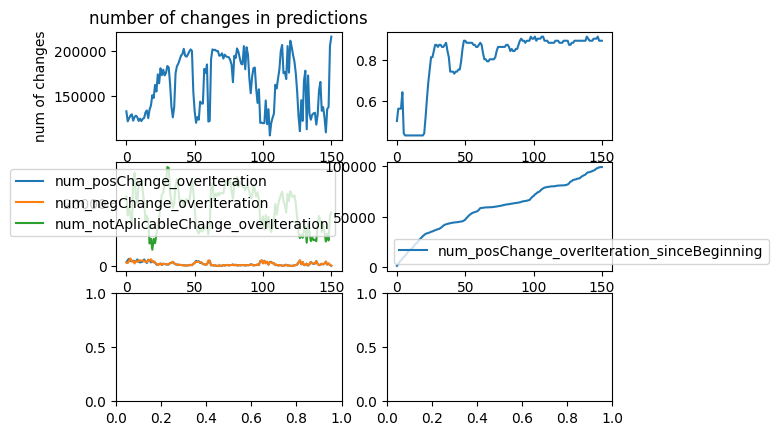

In [38]:
predictionComparisonList_overIterations = rulesResults["predictionComparisonList_overIterations"] 
num_posChange_overIteration = []
num_negChange_overIteration = []
num_noChange_overIteration = []
num_notAplicableChange_overIteration = []

num_posChange_overIteration_sinceBeginning = []

num_posChange_sinceBeginning =0
#num_posChange = 0
#num_negChange = 0
#num_noChange = 0
#num_notAplicableChange = 0
for i in predictionComparisonList_overIterations:
    temp_item = None
    num_posChange = 0
    num_negChange = 0
    num_noChange = 0
    num_notAplicableChange = 0
    for j in i:
        for item in j: 
            if temp_item == None:

                #print(temp_item)
                pass
            elif temp_item == item:
                num_noChange += 1
            elif temp_item == 1:
                if item == 0:
                    num_negChange +=1
                elif item == -1:
                    num_notAplicableChange

            elif temp_item == 0:
                if item ==1:
                    num_posChange +=1
                    num_posChange_sinceBeginning +=1
                elif item == -1:
                    num_notAplicableChange +=1
        
            temp_item = item

    num_posChange_overIteration.append(num_posChange)
    num_negChange_overIteration.append(num_negChange)
    num_noChange_overIteration .append(num_noChange)
    num_notAplicableChange_overIteration.append(num_notAplicableChange)
    num_posChange_overIteration_sinceBeginning.append(num_posChange_sinceBeginning)

print(num_posChange_overIteration)
print(num_negChange_overIteration)
print(num_noChange_overIteration)
print(num_notAplicableChange_overIteration)

        #else:
        #    if sample == 

figAcc, axsAcc = plt.subplots(nrows=3, ncols=2)

    #data = utils.loadData(dataPath+ "data.npz")

axsAcc[0][0].set_title("number of changes in predictions")
axsAcc[0][0].set_xlabel("iteration")
axsAcc[0][0].set_ylabel("num of changes")

#axsAcc.set_yticks([0,20,40,60,80,100,110,120,130,140,])
axsAcc[1][0].plot(num_posChange_overIteration , label='num_posChange_overIteration')
axsAcc[1][0].plot(num_negChange_overIteration, label='num_negChange_overIteration')
axsAcc[0][0].plot(num_noChange_overIteration, label='num_noChange_overIteration')
axsAcc[1][0].plot(num_notAplicableChange_overIteration, label='num_notAplicableChange_overIteration')#
axsAcc[1][0].legend()

axsAcc[1][1].plot(num_posChange_overIteration_sinceBeginning, label='num_posChange_overIteration_sinceBeginning')
axsAcc[1][1].legend()

axsAcc[0][1].plot(trainResults["testAccPerIterationList"], label='testAccPerIterationList')

#axsAcc[2][0].legend()


In [30]:
for i in trainResults:
    print(i)

y_test
inputFeatures
testLossPerEpochList
testLossPerIterationList
testAccPerEpochList
testAccPerIterationList
testPredictionList
testCosine_similarity_toInitialList
testCosine_similarity_toFinalList
testPercentageWeightSignDifferences_toInitialList
testPercentageWeightSignDifferences_toFinalList
testAbsoluteIterationWeightsList
testL2Dist_toInitialList
testL2Dist_toFinalList
testRandom10WeightsList
testGradientsPerSamplePerFeature
testGradientsPerFeature
testGradientMagnitudePerFeature
testAveragedGradientMagnitude
testGradientsPerSamplePerFeature_iteration
testGradientsPerFeature_iteration
testGradientMagnitudePerFeature_iteration
testAveragedGradientMagnitude_iteration


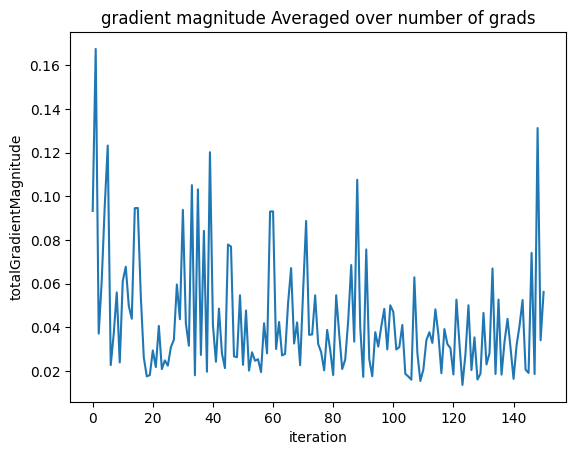

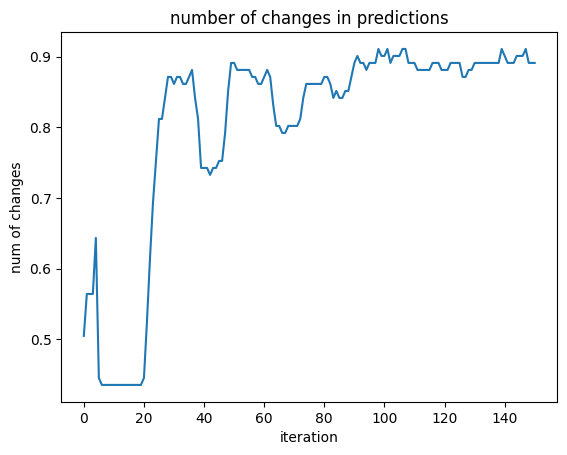

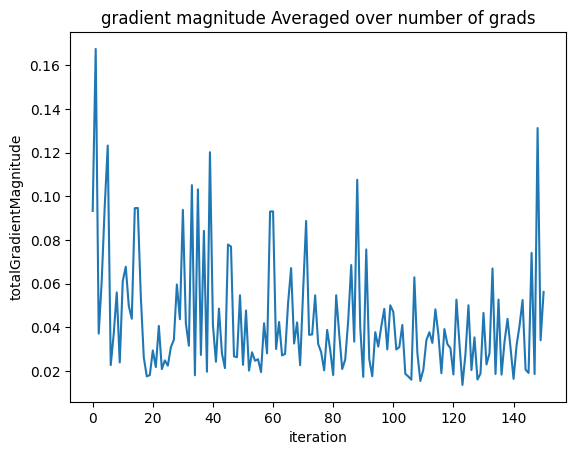

In [31]:
figAcc, axsAcc = plt.subplots(nrows=1, ncols=1)

    #data = utils.loadData(dataPath+ "data.npz")

axsAcc.set_title("number of changes in predictions")
axsAcc.set_xlabel("iteration")
axsAcc.set_ylabel("num of changes")

a = np.load("./WorkingResults/total_gradientsListAveraged", allow_pickle=True)

#axsAcc.set_yticks([0,20,40,60,80,100,110,120,130,140,])
axsAcc.plot(trainResults["testAccPerIterationList"], label='testAccPerIterationList')
a


In [32]:
featureListALL= data["featureListALL"]
featureListALL0= data["featureListALL_0"]

training_acc = data["training_acc"]

#600 trainingdatapoints 
print(len(featureListALL[0]))
sizeDS = 455
for i in range(300):
    #print(featureListALL[0][0:4])
    print(featureListALL[0][i*sizeDS:i*sizeDS +6])
    print(featureListALL0[0][i*sizeDS:i*sizeDS +6])

# optimizer.step() after optimizer.zero_grad()

NameError: name 'data' is not defined

In [ ]:
data =np.load("/home/rosario/explainable/Bachelor/test/Results/seedNum_0_BinaryClassification_KaggleDiabetesALL_Num_Epochs_500batchSize_4_0.001_2023-02-02_131052/data.npz")

for i in data:
    print(i)

featureListALL= data["featureListALL"]
featureListALL0= data["featureListALL_0"]

training_acc = data["training_acc"]

#600 trainingdatapoints 
print(len(featureListALL[0]))
sizeDS = 455
for i in range(300):
    #print(featureListALL[0][0:4])
    print(featureListALL[0][i*sizeDS:i*sizeDS +6])
    print(featureListALL0[0][i*sizeDS:i*sizeDS +6])



featureListALL
featureListALL_0
training_acc
test_acc
training_loss_epoch
training_loss_batch
test_loss_epoch
test_loss_batch
227500
[-0.00698076 -0.0085027  -0.00801412 -0.00801412 -0.00800764 -0.00800764]
[-0.00698141 -0.00850374 -0.00801519 -0.00801519 -0.00801412 -0.00801412]
[-0.00670403 -0.00670905 -0.00619547 -0.00759588 -0.00758976 -0.00758976]
[-0.00670447 -0.00670954 -0.00619596 -0.00759663 -0.00759588 -0.00759588]
[-0.0065961  -0.00643485 -0.00539484 -0.0072094  -0.00720358 -0.00720358]
[-0.00659637 -0.00643515 -0.00539516 -0.00720986 -0.0072094  -0.0072094 ]
[-0.00635397 -0.00617552 -0.00511766 -0.00562402 -0.00684532 -0.00684532]
[-0.00635408 -0.00617565 -0.00511777 -0.0056241  -0.00685089 -0.00685089]
[-0.0019936  -0.00455154 -0.00118515 -0.00276023  0.00183943 -0.00276419]
[-0.00199368 -0.00455161 -0.00118526 -0.00276038  0.00184444 -0.00276023]
[-0.00219194 -0.00226218 -0.00140919 -0.00298498  0.00022611 -0.00298882]
[-0.00219222 -0.00226247 -0.00140952 -0.0029853   0.0